# 실습: 캐글 신용카드 사기 검출

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [193]:
credit_df = pd.read_csv('./필요데이터/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [194]:
credit_df['Class'].value_counts()  # 매우 불균형한 데이터

0    284315
1       492
Name: Class, dtype: int64

In [195]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [196]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 불필요한 컬럼 삭제 후 모델링

### 데이터 전처리

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# 불필요한 컬럼 제거 사용자함수 생성

def get_preprocessed_df(df = None):
    df_copy = df.copy()
    
    df_copy.drop('Time', axis = 1, inplace = True)
    display(df_copy.head())
    return df_copy

# 가공된 데이터프레임의 학습, 검증용 데이터 분할 사용자 함수 만들기
def get_train_test_dataset(df = None):
    df_copy = get_preprocessed_df(df)
    
    X = df_copy.iloc[:,:-1]
    y = df_copy.iloc[:, -1]
    
    # 레이블 데이터 불균형에 따라 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                        random_state = 0,
                                                        stratify = y)
    print(y_train.value_counts()/y_train.count())
    print(y_test.value_counts()/y_test.count())
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(credit_df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    0.998275
1    0.001725
Name: Class, dtype: float64
0    0.998268
1    0.001732
Name: Class, dtype: float64


In [165]:
X_train, X_test, y_train, y_test

(              V1        V2        V3        V4        V5        V6        V7  \
 211605 -8.367621  7.402969 -5.114191 -2.966792 -0.985904 -1.660018  0.397816   
 231628 -1.290662  0.764452 -0.169233 -1.688528  1.984718 -0.717210  1.667635   
 110643 -0.606860  0.233923  2.633361 -0.155762 -0.328850 -0.070593  0.173023   
 11478   1.374168 -0.330389  0.812971 -0.183112 -1.074771 -0.933788 -0.544238   
 243724 -2.146505 -7.603113 -4.928224  1.449173 -2.083871 -0.984759  3.629816   
 ...          ...       ...       ...       ...       ...       ...       ...   
 88290  -1.993953  1.734986 -1.108037 -2.671817  1.605319  3.041992 -0.417771   
 22346  -0.440396  1.062920  1.582218 -0.029761  0.040967 -0.903627  0.730326   
 269968  0.827820 -2.649344 -3.161235  0.209209 -0.561331 -1.570386  1.612531   
 175960 -1.523903 -6.287060 -2.638246  1.330015 -1.672002  1.957509  1.359226   
 47973  -1.608560  0.132746  2.075995 -1.937332 -1.822305 -0.429669  0.247042   
 
               V8        V

### 모델링

In [199]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score

In [200]:
# 모델링 평가 사용자함수 만들기
def get_clf_eval(y_test, pred = None, pred_proba = None):
    print(f'오차 행렬: \n{confusion_matrix(y_test, pred)}')
    print(f'정확도: {accuracy_score(y_test, pred):.4f}')
    print(f'정밀도: {precision_score(y_test, pred):.4f}')
    print(f'재현율: {recall_score(y_test, pred):.4f}')
    print(f'f1 score: {f1_score(y_test, pred):.4f}')
    print(f'auc score: {roc_auc_score(y_test, pred_proba):.4f}')

In [201]:
# 모델링 사용자함수 만들기

def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [202]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [203]:
lr_clf = LogisticRegression(max_iter = 1000)
lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)


models = [lr_clf, lgbm_clf]
for model in models:
    print(f'**{model} 평가 결과**')
    get_model_train_eval(model, X_train, X_test, y_train, y_test)
    print()


**LogisticRegression(max_iter=1000) 평가 결과**
오차 행렬: 
[[85281    14]
 [   58    90]]
정확도: 0.9992
정밀도: 0.8654
재현율: 0.6081
f1 score: 0.7143
auc score: 0.9704

**LGBMClassifier(boost_from_average=False, num_leaves=64) 평가 결과**
오차 행렬: 
[[85289     6]
 [   38   110]]
정확도: 0.9995
정밀도: 0.9483
재현율: 0.7432
f1 score: 0.8333
auc score: 0.9717



## + 중요 피처 정규화_StandardScaler
- 로지스틱 회귀모델은 <b>선형 모델</b>이므로, <b>중요 피처들이 정규분포 형태를 유지하는 것을 선호</b>함

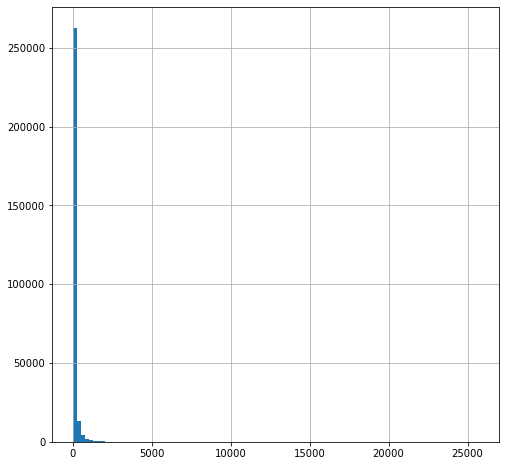

In [204]:
# 모든 피처들이 어떤 변수인지 모름
# 중요피처라고 해봤자 신용카드 총 사용 금액인 Amount 피처밖에 없음!
# 분포 확인해보기

plt.figure(figsize = (8, 8))
credit_df['Amount'].hist(bins = 100)
plt.show()

### 데이터전처리

In [205]:
from sklearn.preprocessing import StandardScaler

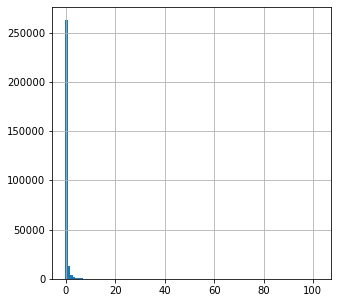

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


0    0.998275
1    0.001725
Name: Class, dtype: float64
0    0.998268
1    0.001732
Name: Class, dtype: float64


In [206]:
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    
    # 중요 피처 정규화
    scaler = StandardScaler()
    amount_scaled = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_scaled)
    
    
    # 궁금하니까 시각화
    plt.figure(figsize = (5, 5))
    df_copy['Amount_Scaled'].hist(bins = 100)
    plt.show()
    
    # 불필요 컬럼 삭제
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    display(df_copy)
    
    return df_copy

# 가공된 데이터프레임의 학습, 검증용 데이터 분할 사용자 함수 만들기
def get_train_test_dataset(df = None):
    df_copy = get_preprocessed_df(df)
    
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    
    # 레이블 데이터 불균형에 따라 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                        random_state = 0,
                                                        stratify = y)
    print(y_train.value_counts()/y_train.count())
    print(y_test.value_counts()/y_test.count())
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(credit_df)

### 모델링

In [207]:
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)


lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)


오차 행렬: 
[[85281    14]
 [   58    90]]
정확도: 0.9992
정밀도: 0.8654
재현율: 0.6081
f1 score: 0.7143
auc score: 0.9702
오차 행렬: 
[[85289     6]
 [   39   109]]
정확도: 0.9995
정밀도: 0.9478
재현율: 0.7365
f1 score: 0.8289
auc score: 0.9744


#### 결론
```
**LogisticRegression(max_iter=1000) 평가 결과**
정확도: 0.9992
정밀도: 0.8654
재현율: 0.6081
f1 score: 0.7143
auc score: 0.9704

**LGBMClassifier(boost_from_average=False, num_leaves=64) 평가 결과**
정확도: 0.9995
정밀도: 0.9483
재현율: 0.7432
f1 score: 0.8333
auc score: 0.9717
```
표준정규화 결과, 결과적으로 큰 차이가 있지 않음. 오히려 lgbm 모델링 평가 결과 정밀도랑 재현율, auc score가 조금 하락함

## + 중요 피처 정규화_Log transform
- <b>로그변환</b>은 <b>데이터 분포도가 심하게 왜곡되어 있을 경우</b> 적용하는 주요 기법임

In [208]:
import numpy as np

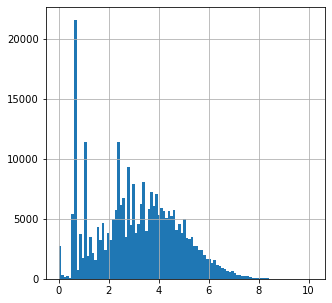

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,4.824306,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4.262539,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.570980,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,3.249987,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,4.232366,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,2.397895,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


0    0.998275
1    0.001725
Name: Class, dtype: float64
0    0.998268
1    0.001732
Name: Class, dtype: float64


In [209]:
def get_preprocessed_df(df = None):
    copy_df = df.copy()
    
    # 로그변환
    amount_log = np.log1p(copy_df['Amount'])
    copy_df.insert(0, 'Amount_Scaled', amount_log)
    
    # 궁금하니까 시각화
    plt.figure(figsize = (5, 5))
    copy_df['Amount_Scaled'].hist(bins = 100)
    plt.show()
    
    # 불필요 컬럼 삭제
    copy_df.drop(['Time', 'Amount'], axis = 1, inplace = True)
    display(copy_df)
    
    return copy_df    

X_train, X_test, y_train, y_test = get_train_test_dataset(credit_df)

In [210]:
X_train, X_test, y_train, y_test

(        Amount_Scaled        V1        V2        V3        V4        V5  \
 211605       0.524729 -8.367621  7.402969 -5.114191 -2.966792 -0.985904   
 231628       4.033710 -1.290662  0.764452 -0.169233 -1.688528  1.984718   
 110643       2.525729 -0.606860  0.233923  2.633361 -0.155762 -0.328850   
 11478        2.397895  1.374168 -0.330389  0.812971 -0.183112 -1.074771   
 243724       7.736766 -2.146505 -7.603113 -4.928224  1.449173 -2.083871   
 ...               ...       ...       ...       ...       ...       ...   
 88290        2.761907 -1.993953  1.734986 -1.108037 -2.671817  1.605319   
 22346        1.275363 -0.440396  1.062920  1.582218 -0.029761  0.040967   
 269968       6.618792  0.827820 -2.649344 -3.161235  0.209209 -0.561331   
 175960       7.480146 -1.523903 -6.287060 -2.638246  1.330015 -1.672002   
 47973        5.261653 -1.608560  0.132746  2.075995 -1.937332 -1.822305   
 
               V6        V7        V8        V9  ...       V19       V20  \
 211605 -1

### 모델링

In [211]:
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)


lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)


오차 행렬: 
[[85283    12]
 [   59    89]]
정확도: 0.9992
정밀도: 0.8812
재현율: 0.6014
f1 score: 0.7149
auc score: 0.9727
오차 행렬: 
[[85289     6]
 [   38   110]]
정확도: 0.9995
정밀도: 0.9483
재현율: 0.7432
f1 score: 0.8333
auc score: 0.9812


#### 결론
```
**LogisticRegression(max_iter=1000) 평가 결과**
정확도: 0.9992
정밀도: 0.8654
재현율: 0.6081
f1 score: 0.7143
auc score: 0.9704

**LGBMClassifier(boost_from_average=False, num_leaves=64) 평가 결과**
정확도: 0.9995
정밀도: 0.9483
재현율: 0.7432
f1 score: 0.8333
auc score: 0.9717
```
로그 변환 결과 역시 로지스틱 회귀의 경우, 재현율이 떨어지고 정밀도, auc 스코어가 증가함.
lgbm의 경우 정밀도와 auc score가 조금 오름

## + 이상치데이터 제거 후 모델 학습/예측/평가

### IQR 방식 적용

In [212]:
import seaborn as sns

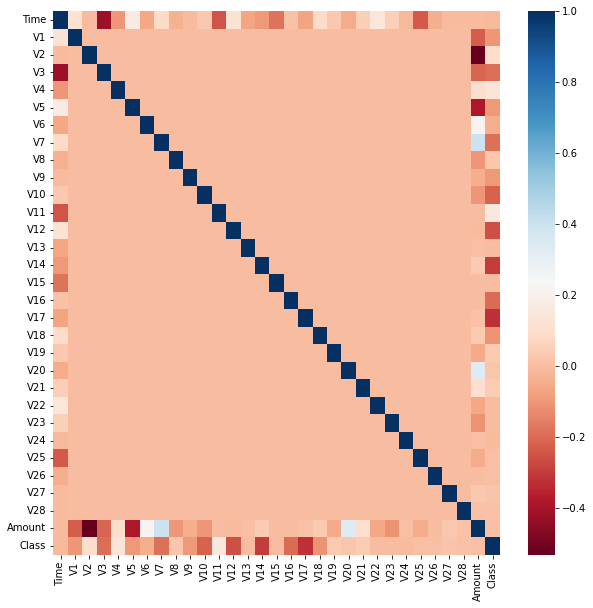

In [213]:
# 피처 간 상관관계 확인
plt.figure(figsize = (10,10))

corr_df = credit_df.corr()
sns.heatmap(corr_df, cmap = 'RdBu')
plt.show()

## 색이 진할 수록 상관관계가 높은데, class와 음의 상관성이 높은 피처는 v14, v17

In [214]:
# 이상치 찾는 사용자함수 만들기

def get_outlier(df = None, column = None, weight = 1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.quantile(fraud, 0.25)
    quantile_75 = np.quantile(fraud, 0.75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index


# 상관성이 높은 피처들의 이상값 찾기
outlier_index_V14 = get_outlier(credit_df, column = 'V14') 
outlier_index_V17 = get_outlier(credit_df, column = 'V17') 

outlier_index_V14, outlier_index_V17

(Int64Index([8296, 8615, 9035, 9252], dtype='int64'),
 Int64Index([], dtype='int64'))

### 데이터전처리

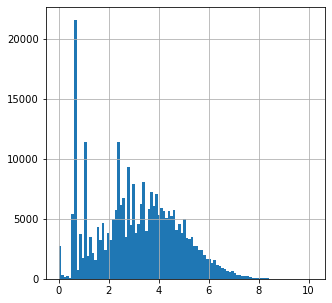

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,4.824306,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4.262539,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.570980,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,3.249987,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,4.232366,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,2.397895,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


0    0.998285
1    0.001715
Name: Class, dtype: float64
0    0.998291
1    0.001709
Name: Class, dtype: float64


In [215]:
def get_preprocessed_df(df = None):
    copy_df = df.copy()
    
    # 로그변환
    amount_log = np.log1p(copy_df['Amount'])
    copy_df.insert(0, 'Amount_Scaled', amount_log)
    
    # 궁금하니까 시각화
    plt.figure(figsize = (5, 5))
    copy_df['Amount_Scaled'].hist(bins = 100)
    plt.show()
    
    # 불필요 컬럼 삭제
    copy_df.drop(['Time', 'Amount'], axis = 1, inplace = True)
    
    
    # 이상치데이터 삭제
    idx = get_outlier(copy_df, column = 'V14')
    copy_df.drop(idx, axis = 0, inplace = True)
    display(copy_df)
    
    return copy_df    


X_train, X_test, y_train, y_test = get_train_test_dataset(credit_df)

In [216]:
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)


lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬: 
[[85281    14]
 [   48    98]]
정확도: 0.9993
정밀도: 0.8750
재현율: 0.6712
f1 score: 0.7597
auc score: 0.9743
오차 행렬: 
[[85288     7]
 [   28   118]]
정확도: 0.9996
정밀도: 0.9440
재현율: 0.8082
f1 score: 0.8708
auc score: 0.9701


#### 결론
```
오차 행렬: 
[[85283    12]
 [   59    89]]
정확도: 0.9992
정밀도: 0.8812
재현율: 0.6014
f1 score: 0.7149
auc score: 0.9727

오차 행렬: 
[[85289     6]
 [   38   110]]
정확도: 0.9995
정밀도: 0.9483
재현율: 0.7432
f1 score: 0.8333
auc score: 0.9812
```

로지스틱 회귀는 재현율이 크게 향상 되었고, auc score가 높아짐
LGBM 역시 재혀뉼이 크게 높아졌지만, auc score은 낮아짐

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- 반드시 학습데이터만 오버샘플링해야함, 검증/테스트 데이터는 오버샘플링 하면 안됨

In [218]:
from imblearn.over_sampling import SMOTE

In [221]:
smote = SMOTE(random_state = 0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(f'변형 전: {X_train.shape}, {y_train.shape}')
print(f'변형 후: {X_train_over.shape}, {y_train_over.shape}')
print(y_train.value_counts(), y_train_over.value_counts())

변형 전: (199362, 29), (199362,)
변형 후: (398040, 29), (398040,)
0    199020
1       342
Name: Class, dtype: int64 0    199020
1    199020
Name: Class, dtype: int64


In [ ]:
오차 행렬: 
[[85281    14]
 [   48    98]]
정확도: 0.9993
정밀도: 0.8750
재현율: 0.6712
f1 score: 0.7597
auc score: 0.9743


### 모델링

In [222]:
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차 행렬: 
[[82937  2358]
 [   11   135]]
정확도: 0.9723
정밀도: 0.0542
재현율: 0.9247
f1 score: 0.1023
auc score: 0.9737


```
오차 행렬: 
[[85281    14]
 [   48    98]]
정확도: 0.9993
정밀도: 0.8750
재현율: 0.6712
f1 score: 0.7597
auc score: 0.9743
```
정밀도는 급격히 낮아지고, 재현율이 급격히 높아짐. 당황스러울 정도.
로지스틱 회귀 모델이 오버 샘플링으로 인해 원본 데이터의 유형보다 너무나 많은 class = 1의 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 class = 1로 적용해버린 탓임.
따라서 정밀도-재현율 곡선을 확인해보자

In [226]:
from sklearn.metrics import precision_recall_curve

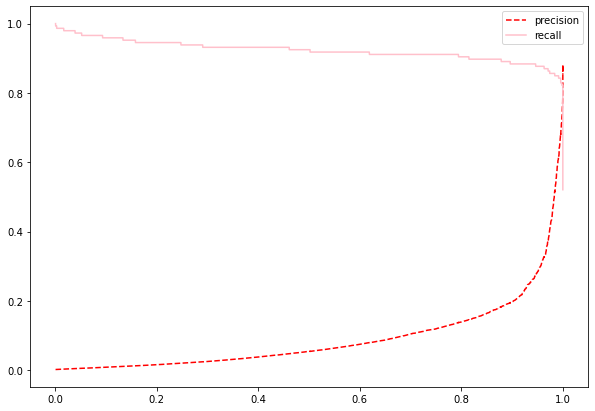

In [243]:
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recall, threshold = precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize = (10,7))
    plt.plot(threshold, precision[:-1], linestyle = '--', color = 'red', label = 'precision')
    plt.plot(threshold, recall[:-1], color = 'pink', label = 'recall')
    plt.legend()
    plt.show()
    
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

곡선을보면 0.9 언저리 부분부터 급격히 정밀도가 상승하는 것이 보임.<br>
재현율은 높은 값을 유지하다가 임곗값이 1에 가까워지면 급 하락함.

In [244]:
lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차 행렬: 
[[85253    42]
 [   21   125]]
정확도: 0.9993
정밀도: 0.7485
재현율: 0.8562
f1 score: 0.7987
auc score: 0.9798


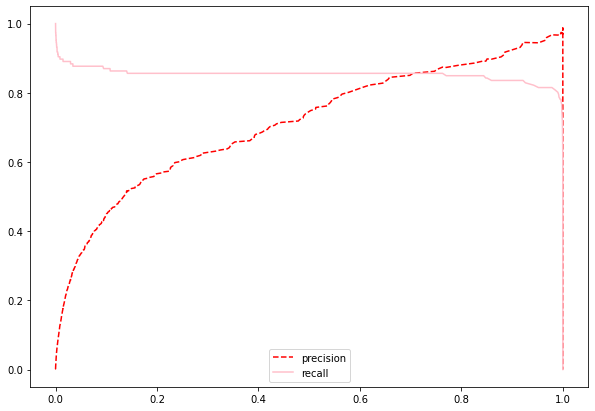

In [245]:
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1])

#### 결론
```
오차 행렬: 
[[85288     7]
 [   28   118]]
정확도: 0.9996
정밀도: 0.9440
재현율: 0.8082
f1 score: 0.8708
auc score: 0.9701
```
정밀도는 많이 낮아지고 재현율은 5% 오름 auc score도 0.009 정도로 미미하게 오르긴 함.
smote로 오버샘플링을 적용하면 정밀도는 낮아지고 재현율은 높아지는게 일반적임.